# Ensemble Learning
`wisdom of the crowd`<br>

if you aggregate the prediction of a group of predictors(classifiers or regressors) you will ofen get a better prediction than with any individual predictor<br>


In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

heads_proba=0.51

# tossing coin in series of 10 attempts,for a total of 1000 times
coin_tosses=(np.random.rand(10000,10)< heads_proba).astype(np.int32)
cumulative_heads_ratio= np.cumsum(coin_tosses,axis=0)/np.arange(1,10001).reshape(-1,1)

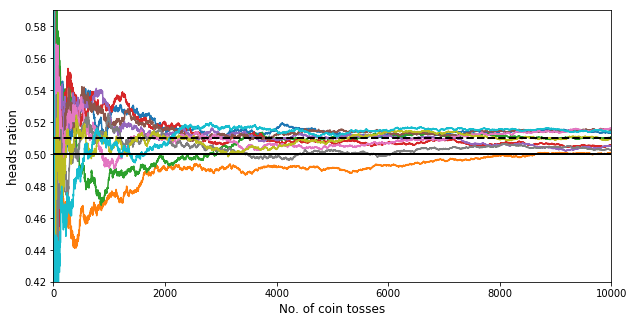

In [18]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],"k--",linewidth=2,label="51%")
plt.plot([0,10000],[0.5,0.5],"k-",linewidth=2,label="50%")
plt.xlabel("No. of coin tosses",fontsize=12)
plt.ylabel("heads ration",fontsize=12)
plt.axis([0,10000,0.42,0.59])
plt.show()

In [31]:
from  sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X,y =make_moons(n_samples=500,noise=0.3,random_state=42)
X

array([[ 8.31039149e-01, -2.58748754e-01],
       [ 1.18506381e+00,  9.20387143e-01],
       [ 1.16402213e+00, -4.55525583e-01],
       [-2.36556013e-02,  1.08628844e+00],
       [ 4.80502733e-01,  1.50942444e+00],
       [ 1.31164912e+00, -5.51176060e-01],
       [ 1.16542367e+00, -1.58629894e-01],
       [ 1.56736404e-01,  1.31817168e+00],
       [ 4.53301022e-01,  4.96074925e-01],
       [ 1.65139719e+00, -4.59804351e-01],
       [ 1.02664982e+00, -1.56999382e-02],
       [-3.99677570e-01,  2.52192940e-01],
       [ 1.85352710e+00, -7.16418704e-01],
       [ 1.17564737e-01,  6.24869329e-01],
       [ 1.54123944e+00, -5.11050694e-01],
       [ 1.32833559e+00, -5.40696860e-01],
       [ 1.97170320e+00,  2.97790052e-01],
       [ 9.44441260e-01,  5.17911799e-01],
       [ 8.30619129e-01, -8.02099114e-01],
       [ 1.89343763e+00, -2.53611270e-01],
       [ 1.88323111e+00,  2.22375278e-01],
       [ 2.30801311e+00,  4.67930154e-01],
       [-3.89437608e-01,  2.39389050e-01],
       [ 1.

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

log_clf= LogisticRegression(random_state=29)
rf_clf = RandomForestClassifier(n_estimators=10,random_state=29)
svm_clf= SVC(random_state=29)

voting_clf= VotingClassifier(estimators=[('lr',log_clf),('rf',rf_clf),('svc',svm_clf)],voting="hard")

In [22]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=29, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFore...rbf', max_iter=-1, probability=False, random_state=29,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [23]:
from sklearn.metrics import accuracy_score
for clf in (log_clf,rf_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.888


In [32]:

svm_clf=SVC(probability=True,random_state=29)
voting_clf= VotingClassifier(estimators=[('lr',log_clf),('rf',rf_clf),('svc',svm_clf)],voting="soft")
from sklearn.metrics import accuracy_score
for clf in (log_clf,rf_clf,svm_clf,voting_clf):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.888
VotingClassifier 0.904


# Bagging & Pasting Ensembles
as we discussed above,one way to diverse set of classifier is to use very different training algortihm
Another approach is to use the same training algo for every predictor but train them on diff diff random set of training set


In [33]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf= BaggingClassifier(
DecisionTreeClassifier(),n_estimators=500,
bootstrap=True,n_jobs=-1,oob_score=True)
bag_clf.fit(X_train,y_train)
bag_clf.oob_score_

0.9013333333333333

In [34]:
# lets verify
y_pred=bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.888

In [35]:
bag_clf.oob_decision_function_

array([[0.3919598 , 0.6080402 ],
       [0.3919598 , 0.6080402 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.10989011, 0.89010989],
       [0.36979167, 0.63020833],
       [0.01639344, 0.98360656],
       [0.99401198, 0.00598802],
       [0.96373057, 0.03626943],
       [0.82080925, 0.17919075],
       [0.00588235, 0.99411765],
       [0.73595506, 0.26404494],
       [0.86315789, 0.13684211],
       [0.96195652, 0.03804348],
       [0.03680982, 0.96319018],
       [0.        , 1.        ],
       [0.97916667, 0.02083333],
       [0.95108696, 0.04891304],
       [1.        , 0.        ],
       [0.01092896, 0.98907104],
       [0.38095238, 0.61904762],
       [0.90322581, 0.09677419],
       [1.        , 0.        ],
       [0.97752809, 0.02247191],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.63333333, 0.36666667],
       [0.

# Random Patches & Random Subspaces

The Bagging Classifier also supports sampling the feature as well
max_features
bootstaps_feature
sampling both training instances and features is called as **Random PAtches method**
keeping all the training instances (i.e bootstap=False and max_feature=1) but sampling the features that is bootstrap_feature= True and/or max feature smaller than 1).this is what we call random subspaces

## Random Forest
Random Forest is basically an assemble of decision Trees,trained via

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_clf= RandomForestClassifier(n_estimators=500, max_leaf_nodes=16,n_jobs=-1)
rf_clf.fit(X_train,y_train)
y_pred_rf= rf_clf.predict(X_test)

In [42]:
np.sum(y_test==y_pred_rf)/len(y_pred_rf)

0.912

BaggingClassifier(
DecisionTreeClassifier(),  )...here in bagging and pasting  we used one classifier, can we use more classifier instead of one as like we did in VotingClassifier?

## Extra Trees(extremely randomized trees)


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

# Feature Importance



In [45]:
from sklearn.datasets import load_iris
iris= load_iris()
rnd_clf= RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=42)

rnd_clf.fit(iris['data'],iris['target'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [46]:
for name,score in zip(iris['feature_names'],rnd_clf.feature_importances_):
    print(name,score)


sepal length (cm) 0.11249225099876374
sepal width (cm) 0.023119288282510326
petal length (cm) 0.44103046436395765
petal width (cm) 0.4233579963547681


# Boosting
`combining several weak learners into one strong learner`

2 most commonly used approaches in boosting are 
- AdaBoost
- Gradient Boosting

## AdaBoost
one way for a new predictor to correct its predecessor is to focus more 

In [47]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf= AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=1),n_estimators=200,
learning_rate=0.5,random_state=29)
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.5, n_estimators=200, random_state=29)

In [49]:
np.random.seed(29)
X= np.random.rand(100,1)-0.5
y=3*X[:,0]**2+0.5*np.random.randn(100)

In [50]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor(max_depth=2,random_state=29)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=29, splitter='best')

In [51]:
y2=y-tree_reg.predict(X) #residual error
tree_reg2 =DecisionTreeRegressor(max_depth=2,random_state=29)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=29, splitter='best')

In [52]:
y3 = y2-tree_reg2.predict(X)
tree_reg3 =DecisionTreeRegressor(max_depth=2,random_state=29)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=29, splitter='best')

In [53]:
# new testing instance
X_new = np.array([[0.8]])

In [55]:
y_pred=sum(tree.predict(X_new) for tree in (tree_reg,tree_reg2,tree_reg3))

In [61]:
y_pred

array([0.61515247])

In [59]:
tree_reg3.predict(X_new)

array([0.01036008])

In [ ]:
# XGBoost
Could you please again explain max_features parameter?

XGBoost provides a parallel tree boosting approach


why we do sum of all prediction in Gradient Boosting?